### Import the package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('water-treatment.data',header=None,index_col=0,na_values='?').astype(np.float64)

In [3]:
data.head(5)

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,,,,,,,,,,,,,,,,,,,,,
D-1/3/90,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110.0,7.9,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
D-2/3/90,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660.0,7.7,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
D-4/3/90,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666.0,7.7,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
D-5/3/90,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430.0,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
D-6/3/90,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,7.9,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


In [4]:
data.fillna(data.mean(),inplace=True)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,,,,,,,,,,,,,,,,,,,,,
D-1/3/90,44101.0,1.5,7.8,188.714286,407.0,166.0,66.3,4.5,2110.0,7.9,...,2000.0,39.085806,58.8,95.5,83.448049,70.0,89.013646,79.4,87.3,99.6
D-2/3/90,39024.0,3.0,7.7,188.714286,443.0,214.0,69.2,6.5,2660.0,7.7,...,2590.0,39.085806,60.7,94.8,83.448049,80.8,89.013646,79.5,92.1,100.0
D-4/3/90,32229.0,5.0,7.6,188.714286,528.0,186.0,69.9,3.4,1666.0,7.7,...,1888.0,39.085806,58.2,95.6,83.448049,52.9,89.013646,75.8,88.7,98.5
D-5/3/90,35023.0,3.5,7.9,205.000000,588.0,192.0,65.6,4.5,2430.0,7.8,...,1840.0,33.100000,64.2,95.3,87.300000,72.3,90.200000,82.3,89.6,100.0
D-6/3/90,36924.0,1.5,8.0,242.000000,496.0,176.0,64.8,4.0,2110.0,7.9,...,2120.0,39.085806,62.7,95.6,83.448049,71.0,92.100000,78.2,87.5,99.5


In [5]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,37226.567780,2.359065,7.810057,188.714286,406.898273,227.444867,61.393217,4.593825,1478.620493,7.829981,...,1494.817490,39.085806,58.518738,90.554200,83.448049,67.817365,89.013646,77.856574,88.963391,99.086290
std,6521.467717,2.741657,0.246175,60.690777,119.674524,135.811306,12.284760,2.677945,394.898019,0.226925,...,387.537253,13.893820,12.753775,8.712181,8.462875,11.326846,6.782899,8.675122,8.158851,4.323828
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32964.000000,0.900000,7.600000,148.000000,326.500000,170.000000,55.850000,3.200000,1201.000000,7.700000,...,1235.000000,31.150000,50.600000,88.900000,81.800000,63.400000,87.800000,74.250000,87.700000,99.200000
50%,36215.000000,1.500000,7.800000,185.000000,400.000000,196.000000,64.000000,4.500000,1406.000000,7.800000,...,1433.000000,39.085806,59.300000,93.300000,85.000000,69.300000,89.900000,78.700000,90.700000,99.700000
75%,41094.000000,3.000000,8.000000,222.000000,474.500000,242.000000,69.600000,5.500000,1672.000000,8.000000,...,1691.500000,47.650000,66.800000,95.700000,87.700000,75.000000,92.300000,83.200000,93.000000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


#### Standardize the dataset 


In [6]:
ss = StandardScaler(with_std=False)
sdf = ss.fit_transform(data)

#### Performing TSNE non-linear dimensionality reduction

In [7]:
tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(sdf)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=data.index)
dff = pd.concat([data, df_tsne], axis=1)
df_tsne

,x,y
0,,
D-1/3/90,15.230016,36.037579
D-2/3/90,-22.527006,53.002937
D-4/3/90,15.647580,-47.815315
D-5/3/90,-3.527467,-14.927239
D-6/3/90,-13.286261,11.107635
...,...,...
D-26/8/91,8.775798,-32.692902
D-27/8/91,8.787966,-29.403006
D-28/8/91,11.090416,-31.724100


#### Visualizing the data

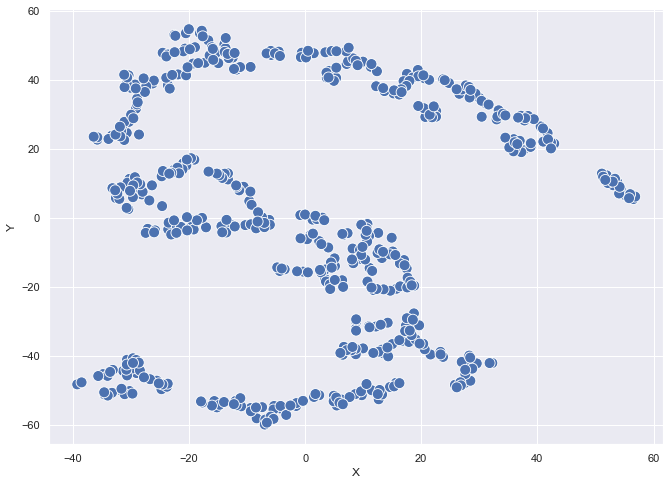

In [8]:
sns.set()
fig, ax = plt.subplots(figsize=(11, 8))
sns.scatterplot(x='x', y='y',size=0,sizes=(120, 120),data=dff,legend=False,ax=ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [9]:
nb_clusters = [4, 6, 8, 10]
linkages = ['single', 'complete', 'ward', 'average']

cpcs = np.zeros(shape=(len(linkages), len(nb_clusters)))
silhouette_scores = np.zeros(shape=(len(linkages), len(nb_clusters)))

for i, l in enumerate(linkages):
    for j, nbc in enumerate(nb_clusters):
        dm = pdist(sdf, metric='minkowski', p=2)
        Z = linkage(dm, method=l)
        cpc, _ = cophenet(Z, dm)
        cpcs[i, j] = cpc

        ag = AgglomerativeClustering(n_clusters=nbc, affinity='euclidean', linkage=l)
        Y_pred = ag.fit_predict(sdf)
        sls = silhouette_score(sdf, Y_pred, random_state=1000)
        silhouette_scores[i, j] = sls

In [10]:
print("Cophent Correlation \n")
print(cpcs)
print("\n")
print("Silhouette Score \n")
print(silhouette_scores)

Cophent Correlation 

[[0.51677558 0.51677558 0.51677558 0.51677558]
 [0.70337033 0.70337033 0.70337033 0.70337033]
 [0.65114667 0.65114667 0.65114667 0.65114667]
 [0.76372175 0.76372175 0.76372175 0.76372175]]


Silhouette Score 

[[ 0.60842208  0.0640391  -0.32109888 -0.34922835]
 [ 0.43101676  0.47132454  0.46506391  0.3843502 ]
 [ 0.47179678  0.42568817  0.40937809  0.38304771]
 [ 0.55260072  0.4272894   0.41168674  0.3866386 ]]


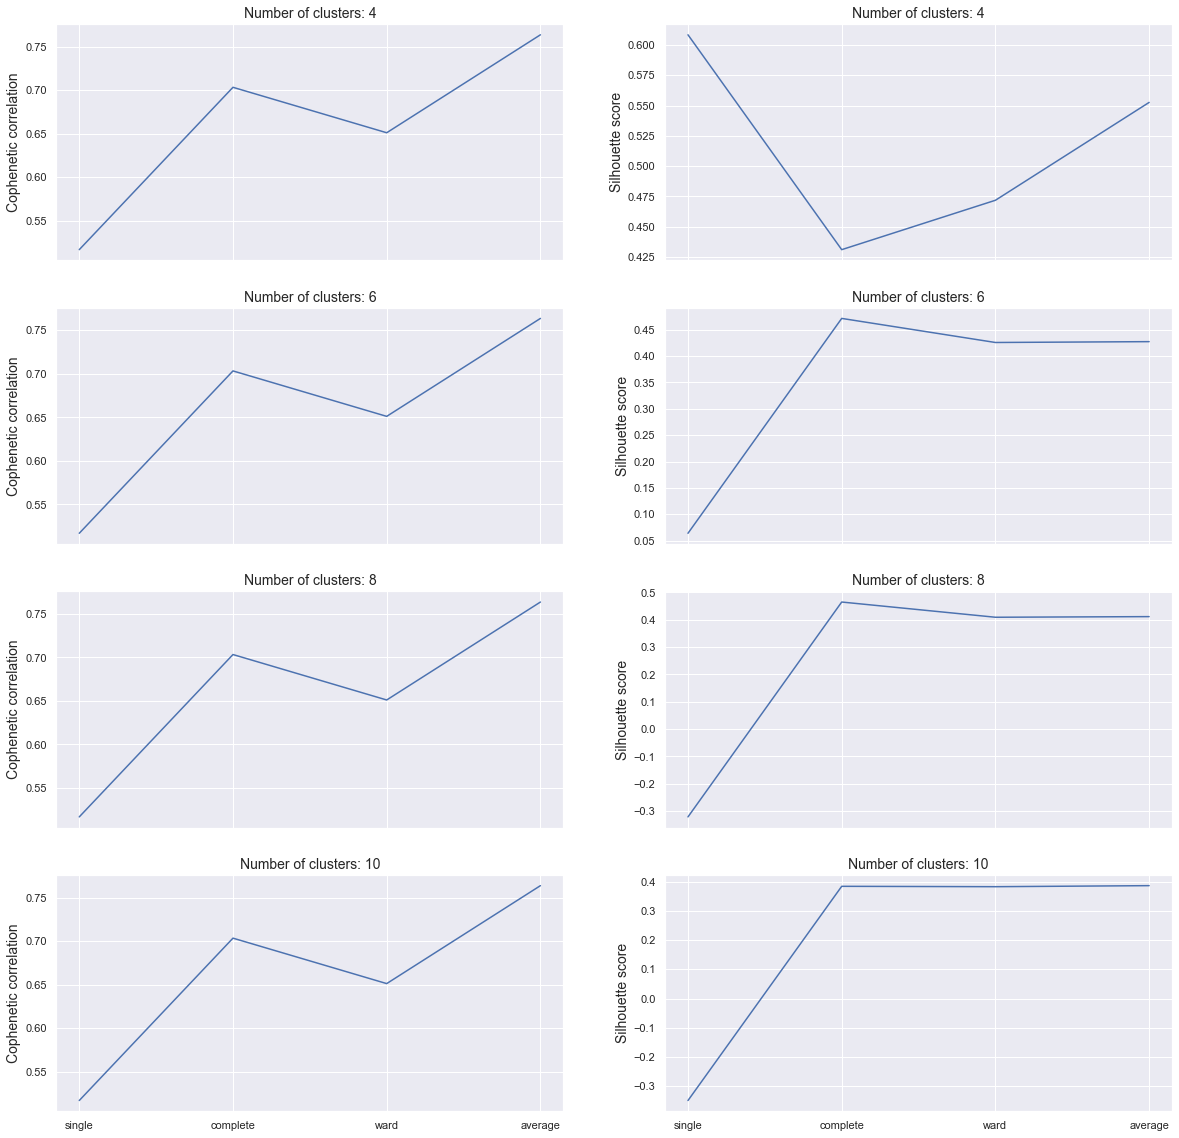

In [11]:
fig, ax = plt.subplots(len(nb_clusters), 2, figsize=(20, 20), sharex=True)

for i in range(len(nb_clusters)):
    ax[i, 0].plot(cpcs[:, i])
    ax[i, 0].set_ylabel('Cophenetic correlation', fontsize=14)
    ax[i, 0].set_title('Number of clusters: {}'.format(nb_clusters[i]), fontsize=14)

    ax[i, 1].plot(silhouette_scores[:, i])
    ax[i, 1].set_ylabel('Silhouette score', fontsize=14)
    ax[i, 1].set_title('Number of clusters: {}'.format(nb_clusters[i]), fontsize=14)

plt.xticks(np.arange(len(linkages)), linkages)

plt.show()

Cophentic Correlation is reasonably acceptable for complete and average linkage, while it's too low for single linkage. 

Considering the silhouette Scores, the maximum value(about 0.6) is achieved with single linkage and four clusters.  Out of four, the single linkage is the best choice. However all the other diagrams show a maximum corresponding to complete linkage(and minimum for single linkage).

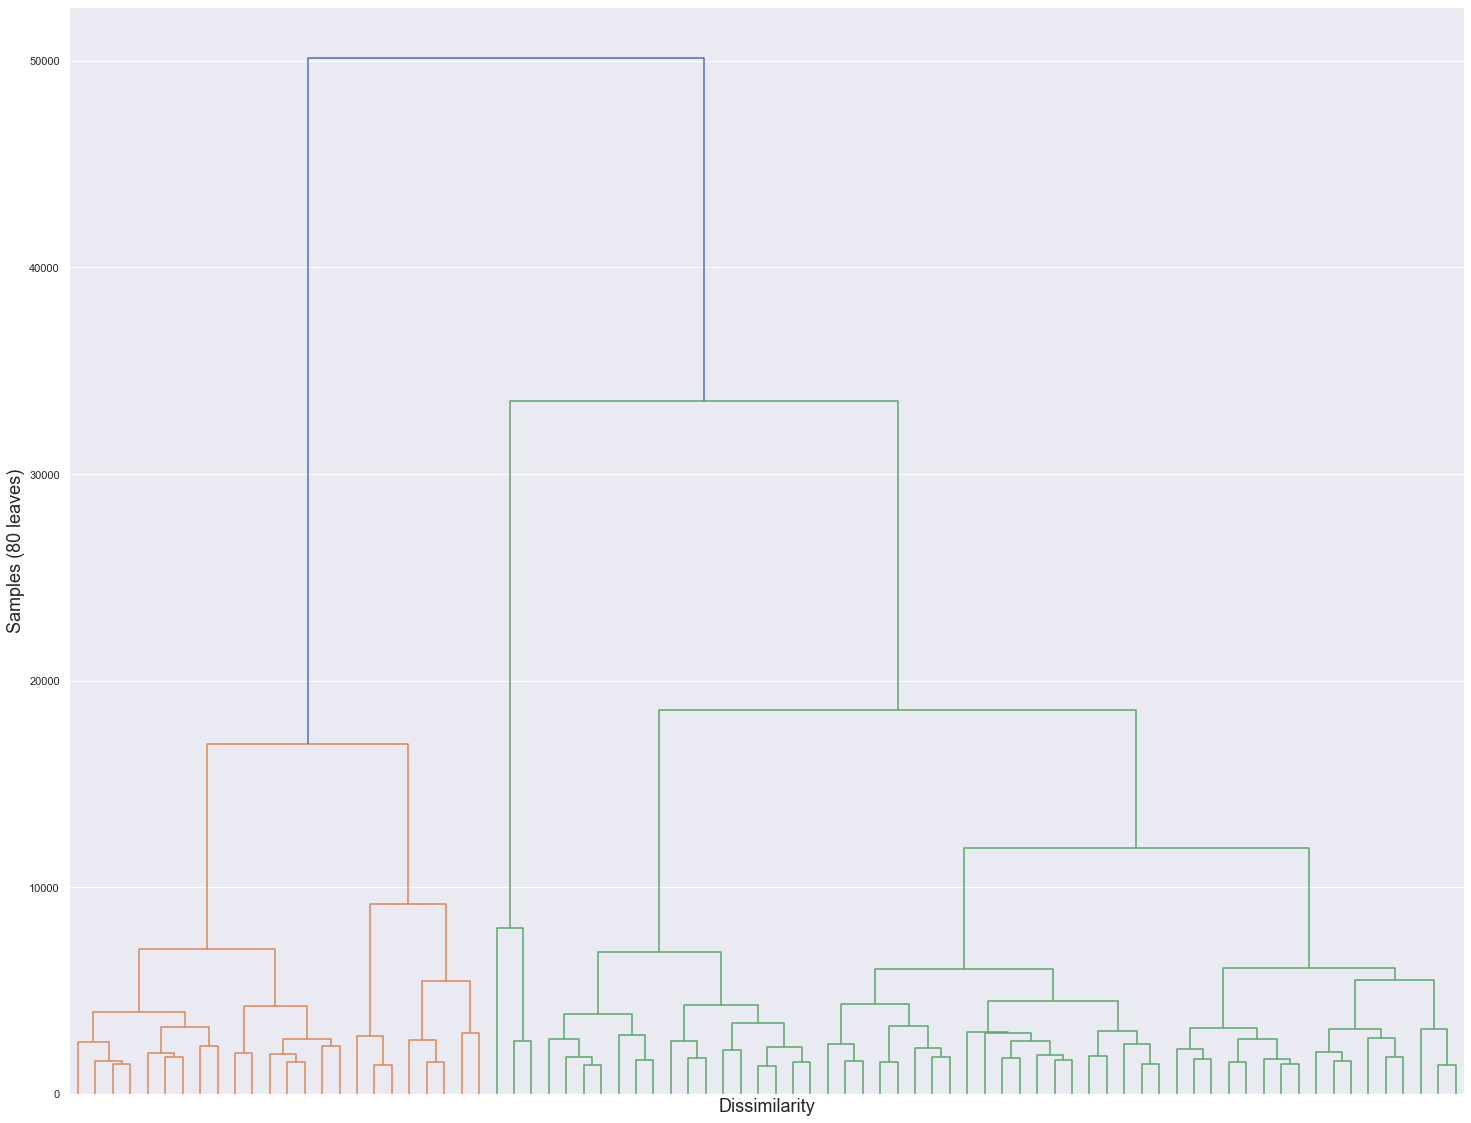

In [12]:
dm = pdist(sdf, metric='euclidean')
Z = linkage(dm, method='complete')

fig, ax = plt.subplots(figsize=(25, 20))

d = dendrogram(Z, truncate_mode='lastp', p=80, no_labels=True, ax=ax)

ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples (80 leaves)', fontsize=18)

plt.show()

In [13]:
ag = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')
Y_pred = ag.fit_predict(sdf)
df_pred = pd.Series(Y_pred, name='Cluster', index=data.index)
pdff = pd.concat([dff, df_pred], axis=1)

pdff.loc[:,['x','y','Cluster']]

,x,y,Cluster
0,,,
D-1/3/90,15.230016,36.037579,0
D-2/3/90,-22.527006,53.002937,4
D-4/3/90,15.647580,-47.815315,2
D-5/3/90,-3.527467,-14.927239,2
D-6/3/90,-13.286261,11.107635,2
...,...,...,...
D-26/8/91,8.775798,-32.692902,2
D-27/8/91,8.787966,-29.403006,2
D-28/8/91,11.090416,-31.724100,2


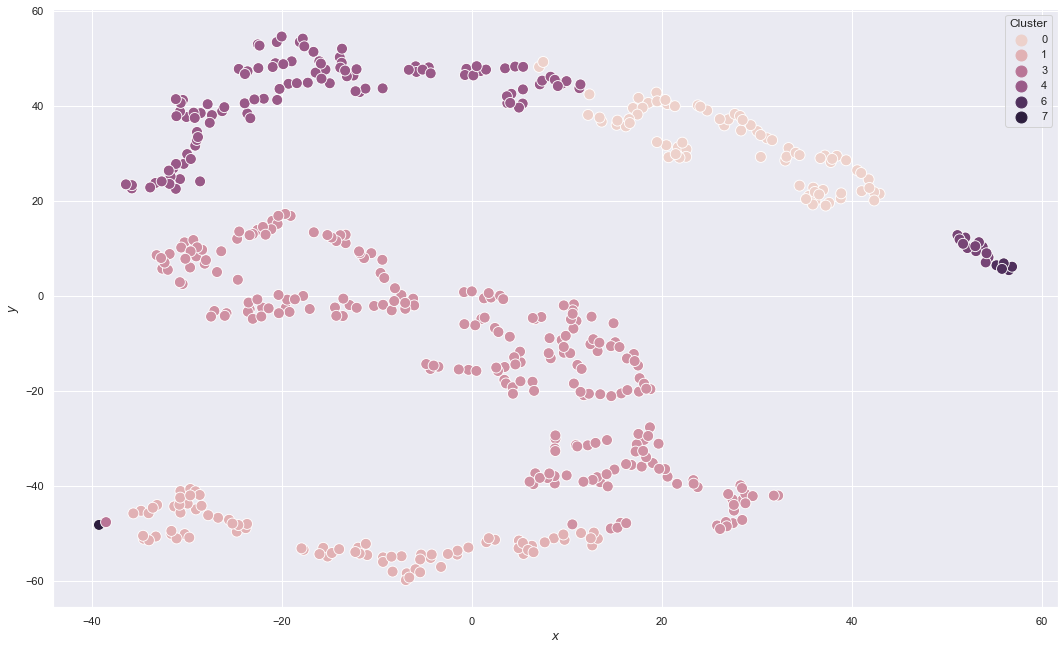

In [14]:
fig, ax = plt.subplots(figsize=(18, 11))

        
sns.scatterplot(x='x', y='y',hue='Cluster', size='Cluster',sizes=(120, 120),data=pdff,ax=ax)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

As expected, the clusters are uneven, but they are quite coherent with the geometry. From the region, -40 to -20, there could be outliers. Let's cut the dendrogram with corresponding two clusters.

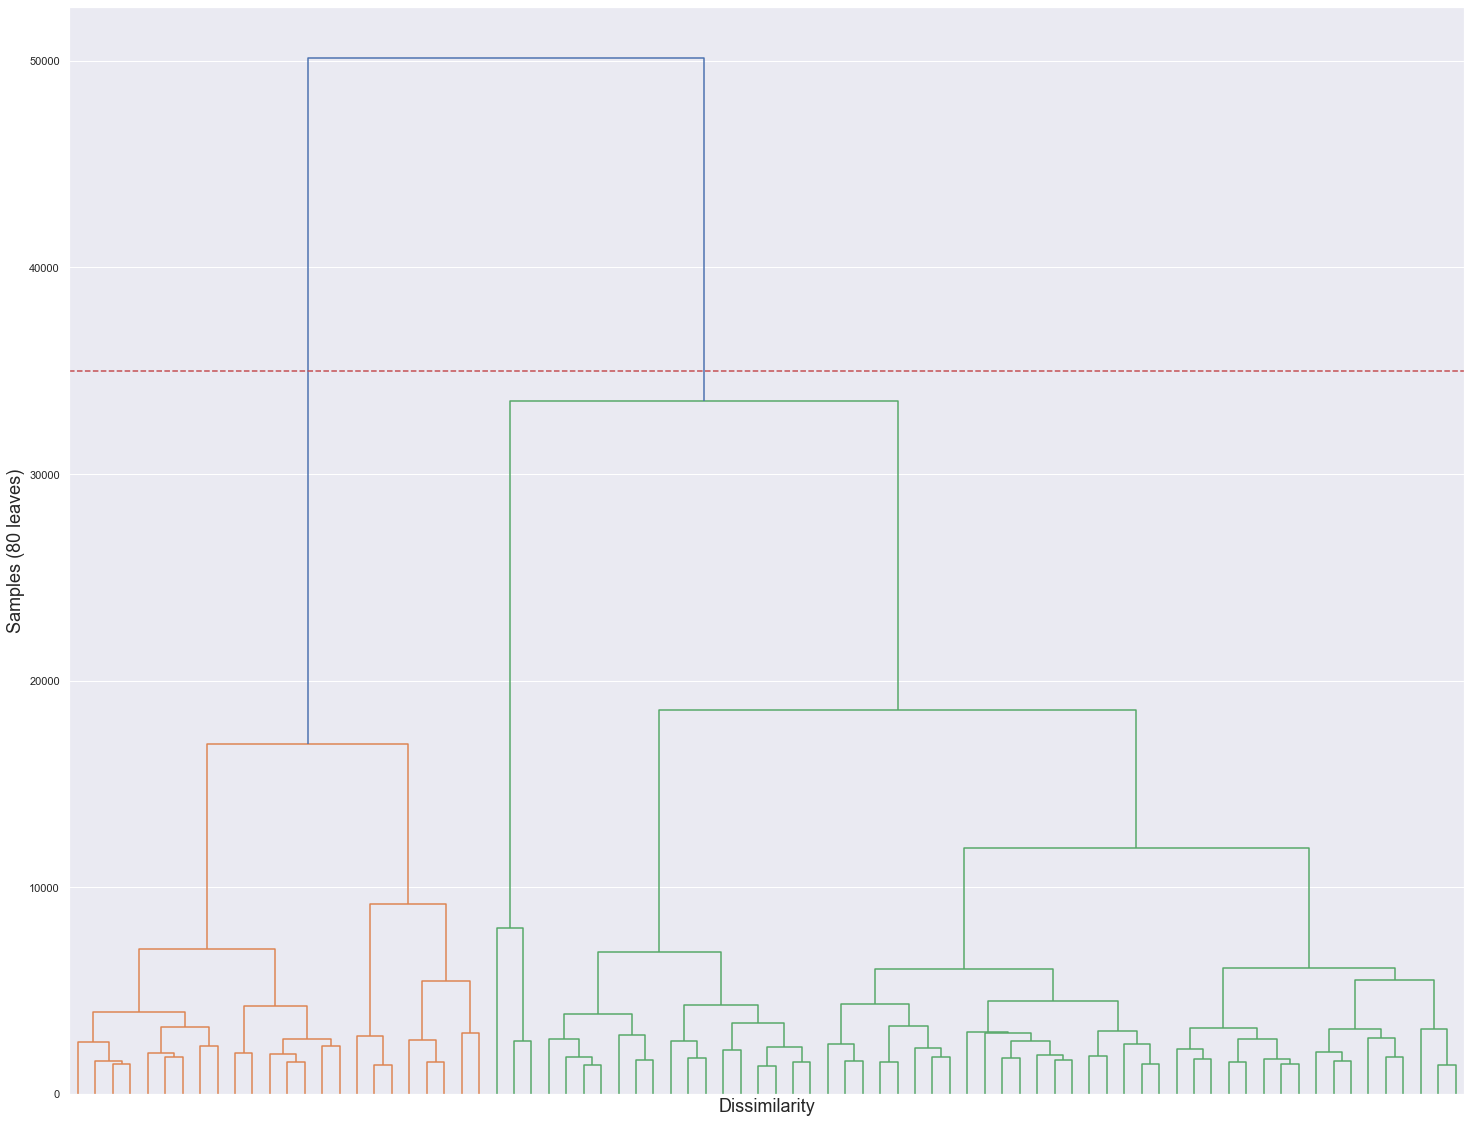

In [15]:
dm = pdist(sdf, metric='euclidean')
Z = linkage(dm, method='complete')

fig, ax = plt.subplots(figsize=(25, 20))

d = dendrogram(Z, truncate_mode='lastp', p=80, no_labels=True, ax=ax)

ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples (80 leaves)', fontsize=18)
ax.axhline(y=35000,color='r', linestyle='--')

plt.show()

In [16]:
ag = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
Y_pred = ag.fit_predict(sdf)
df_pred = pd.Series(Y_pred, name='Cluster', index=data.index)
pdff = pd.concat([dff, df_pred], axis=1)

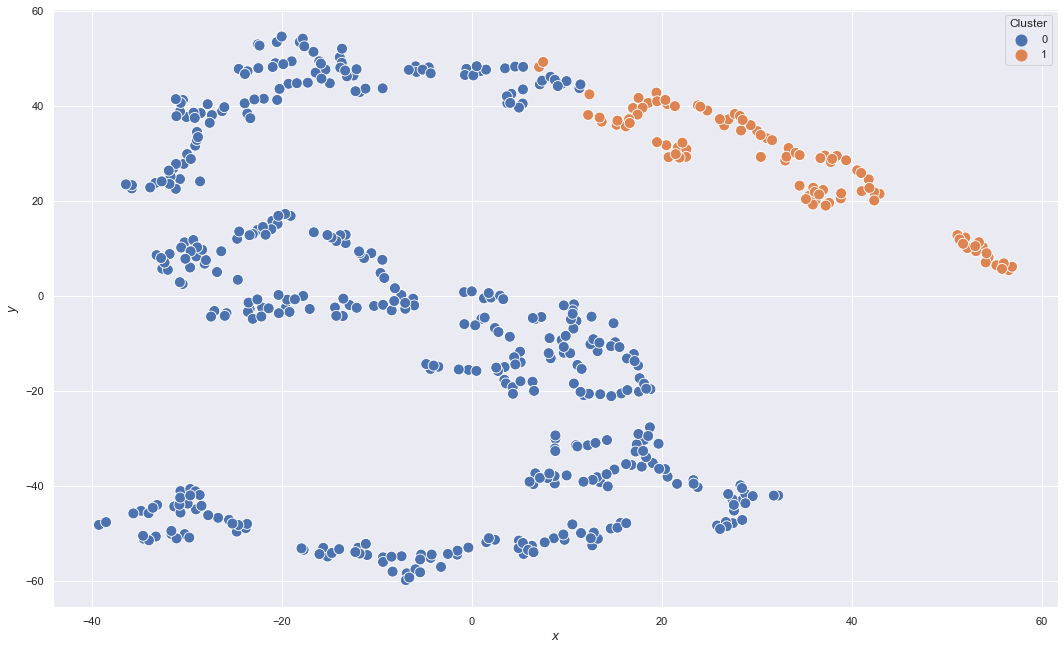

In [17]:
fig, ax = plt.subplots(figsize=(18, 11))

        
sns.scatterplot(x='x', y='y',hue='Cluster', size='Cluster',sizes=(120, 120),data=pdff,ax=ax)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()